In [16]:
import pandas as pd
notes_for_sale = pd.read_csv( 'C:\lc data\SecondaryMarketAllNotes.csv' ) #https://resources.lendingclub.com/SecondaryMarketAllNotes.csv')

C:\Users\Dharik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline

In [18]:
notes_for_sale.columns = ['LoanId', 'NoteId', 'OrderId', 'OutstandingPrincipal',
       'AccruedInterest', 'Status', 'AskPrice', 'Markup', 'YTM',
       'DaysSinceLastPayment', 'CreditScoreTrend', 'FICO',
       'DateListed', 'NeverLate', 'LoanClass', 'LoanMaturity',
       'OriginalNoteAmount', 'InterestRate', 'RemainingPayments',
       'PrincipalPlusInterest', 'ApplicationType']

In [19]:
notes_for_sale = notes_for_sale[notes_for_sale.AskPrice > 1]
notes_for_sale.DaysSinceLastPayment = pd.to_numeric(notes_for_sale.DaysSinceLastPayment, errors="coerce")
notes_for_sale.DateListed = pd.to_datetime(notes_for_sale.DateListed, errors="coerce", format="%m/%d/%Y")
notes_for_sale.YTM = pd.to_numeric(notes_for_sale.YTM, errors="coerce")
notes_for_sale.DaysSinceLastPayment = pd.to_numeric(notes_for_sale.DaysSinceLastPayment, errors="coerce")
notes_for_sale.CreditScoreTrend = notes_for_sale.CreditScoreTrend.astype('category')

notes_for_sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331807 entries, 14 to 331831
Data columns (total 21 columns):
LoanId                   331807 non-null int64
NoteId                   331807 non-null int64
OrderId                  331807 non-null int64
OutstandingPrincipal     331807 non-null float64
AccruedInterest          331807 non-null float64
Status                   331807 non-null object
AskPrice                 331807 non-null float64
Markup                   331807 non-null float64
YTM                      331806 non-null float64
DaysSinceLastPayment     320361 non-null float64
CreditScoreTrend         331807 non-null category
FICO                     331807 non-null object
DateListed               331807 non-null datetime64[ns]
NeverLate                331807 non-null bool
LoanClass                331807 non-null object
LoanMaturity             331807 non-null int64
OriginalNoteAmount       331807 non-null float64
InterestRate             331807 non-null float64
RemainingPay

In [20]:
bad_notes = notes_for_sale[ notes_for_sale.Status.isin( ['In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)']) ]
grace_notes = notes_for_sale[ notes_for_sale.Status.isin( ['In Grace Period'] ) ]
good_notes = notes_for_sale[ notes_for_sale.Status.isin( ['Current'] ) ]
print( len(bad_notes) )
print( len(grace_notes) )
print( len(good_notes) )

26344
5373
295152


In [21]:
good_notes.query('DaysSinceLastPayment > 30 & YTM > 3')

,LoanId,NoteId,OrderId,OutstandingPrincipal,AccruedInterest,Status,AskPrice,Markup,YTM,DaysSinceLastPayment,CreditScoreTrend,FICO,DateListed,NeverLate,LoanClass,LoanMaturity,OriginalNoteAmount,InterestRate,RemainingPayments,PrincipalPlusInterest,ApplicationType
935,9807670,36425174,14845835,7.11,0.09,Current,7.27,0.97,4.27,36.0,UP,685-689,2016-04-27,False,B3,36,25.0,11.99,9,7.20,INDIVIDUAL
1347,10606721,38327376,109699292,7.93,0.12,Current,8.20,1.86,3.18,39.0,DOWN,545-549,2016-04-22,True,B4,36,25.0,12.85,10,8.05,INDIVIDUAL
1803,10180468,37410866,15198872,8.44,0.16,Current,8.66,0.70,11.02,32.0,DOWN,580-584,2016-04-22,False,D4,36,25.0,19.22,10,8.60,INDIVIDUAL
2800,13196591,43608543,83633927,9.40,0.14,Current,9.66,1.26,5.82,39.0,DOWN,605-609,2016-04-28,False,B4,36,25.0,12.49,13,9.54,INDIVIDUAL
4499,16323244,48157527,108569782,10.63,0.12,Current,10.91,1.49,4.29,36.0,DOWN,550-554,2016-04-27,True,B2,36,25.0,10.15,14,10.75,INDIVIDUAL
5352,16151910,47063484,23411869,10.98,0.19,Current,11.27,0.90,8.73,43.0,DOWN,610-614,2016-04-24,True,C3,36,25.0,13.98,14,11.17,INDIVIDUAL
5618,2005310,15487488,3947517,11.04,0.25,Current,11.73,3.90,10.55,38.0,DOWN,640-644,2016-04-27,False,D3,60,25.0,18.75,20,11.29,INDIVIDUAL
5619,2005310,15486337,3947441,11.04,0.25,Current,11.32,0.27,15.14,38.0,DOWN,640-644,2016-04-25,False,D3,60,25.0,18.75,20,11.29,INDIVIDUAL
6202,19796562,50643664,28118207,11.42,0.12,Current,11.70,1.39,5.44,31.0,DOWN,655-659,2016-04-02,False,B3,36,25.0,10.99,15,11.54,INDIVIDUAL
7085,19207427,50088117,27375702,11.65,0.19,Current,11.99,1.27,7.28,39.0,DOWN,600-604,2016-03-22,False,C2,36,25.0,13.35,16,11.84,INDIVIDUAL


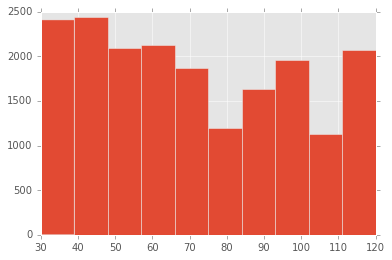

In [22]:
bad_notes.DaysSinceLastPayment.hist(range=(30,120))

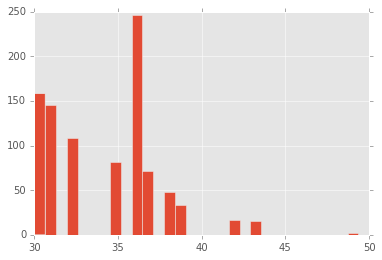

In [23]:
good_notes.DaysSinceLastPayment.hist(range=(30,50), bins=31)

In [42]:
good_notes.query('Markup < 0 & YTM > .3 & CreditScoreTrend == "UP" & NeverLate == True & RemainingPayments < 18 & AskPrice < 20 & DaysSinceLastPayment < 31')

,LoanId,NoteId,OrderId,OutstandingPrincipal,AccruedInterest,Status,AskPrice,Markup,YTM,DaysSinceLastPayment,CreditScoreTrend,FICO,DateListed,NeverLate,LoanClass,LoanMaturity,OriginalNoteAmount,InterestRate,RemainingPayments,PrincipalPlusInterest,ApplicationType
4364,14459716,49343455,26531091,10.63,0.03,Current,10.65,-0.09,7.99,4.0,UP,800-804,2016-04-26,True,B2,36,25.0,10.15,14,10.66,INDIVIDUAL
5250,19926754,51265207,28611445,11.07,0.06,Current,11.12,-0.09,4.89,22.0,UP,715-719,2016-04-26,True,A3,36,25.0,7.12,15,11.13,INDIVIDUAL
6606,24845516,55282428,34229818,11.67,0.03,Current,11.69,-0.09,4.02,10.0,UP,765-769,2016-04-25,True,A1,36,25.0,6.03,16,11.70,INDIVIDUAL
6792,24004522,54653302,33238789,11.71,0.03,Current,11.73,-0.09,4.57,9.0,UP,700-704,2016-04-26,True,A2,36,25.0,6.49,16,11.74,INDIVIDUAL
6895,23093352,54174999,33096953,11.71,0.06,Current,11.76,-0.08,4.47,24.0,UP,720-724,2016-04-26,True,A2,36,25.0,6.49,16,11.77,INDIVIDUAL
7587,24635438,55462467,34798158,11.96,0.03,Current,11.98,-0.08,7.19,4.0,UP,700-704,2016-04-26,True,B1,36,25.0,9.17,16,11.99,INDIVIDUAL
7602,25176402,55620593,34839106,11.96,0.03,Current,11.98,-0.08,7.19,4.0,UP,690-694,2016-04-26,True,B1,36,25.0,9.17,16,11.99,INDIVIDUAL
7604,24796612,55462425,34798158,11.96,0.03,Current,11.98,-0.08,7.19,4.0,UP,735-739,2016-04-26,True,B1,36,25.0,9.17,16,11.99,INDIVIDUAL
7901,24616988,55462479,34798158,12.05,0.03,Current,12.07,-0.08,8.28,4.0,UP,755-759,2016-04-26,True,B2,36,25.0,10.15,16,12.08,INDIVIDUAL
8315,25176584,55689730,34862907,12.19,0.04,Current,12.21,-0.16,9.80,4.0,UP,750-754,2016-04-26,True,B4,36,25.0,11.67,16,12.23,INDIVIDUAL


In [25]:
current_notes.DaysSinceLastPayment.hist()

NameError: name 'current_notes' is not defined